In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
### Reading the csv file
df = pd.read_csv('assignment-1-data.csv')
df.shape

(2938, 22)

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Data Preprocessing

In [4]:
### Checking if there is any null values in our data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Dropping the NaN Values that affects our Life expectancy for each specific dataframe 
df_0 = df.dropna(subset=['Schooling','Income composition of resources','Life expectancy ','Adult Mortality',' BMI ',' HIV/AIDS','GDP','Diphtheria ',' thinness  1-19 years'])
df_1 = df.dropna(subset=['under-five deaths ','Hepatitis B','Life expectancy ','Alcohol','infant deaths',' HIV/AIDS','GDP','Diphtheria ',' thinness 5-9 years'])
df_2 = df.dropna(subset=['Total expenditure',' BMI ','Life expectancy ','Alcohol','Measles ','percentage expenditure','GDP','Population','infant deaths'])
df_3 = df.dropna(subset=['Adult Mortality',' BMI ','Life expectancy ',' HIV/AIDS','Schooling','Status','Income composition of resources',' thinness  1-19 years','Diphtheria '])
df_4 = df.dropna(subset=['Population','Total expenditure','Life expectancy ',' HIV/AIDS','Hepatitis B','infant deaths','Measles ','Year','GDP'])

In [6]:
# Check
print(df_0.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

(2450, 22)
(1857, 22)
(2101, 22)
(2728, 22)
(1659, 22)


In [7]:
# Check
print(df_0.isnull().sum())
print()
print(df_1.isnull().sum())
print()
print(df_2.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            146
percentage expenditure               0
Hepatitis B                        456
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  149
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                         220
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

Country                              0
Year                                 0
Status                               0
Life expect

# Data Visualization

In [8]:
# Deciding which features affects the value of life expentancy
cm = df.corr(method='pearson')

<AxesSubplot:>

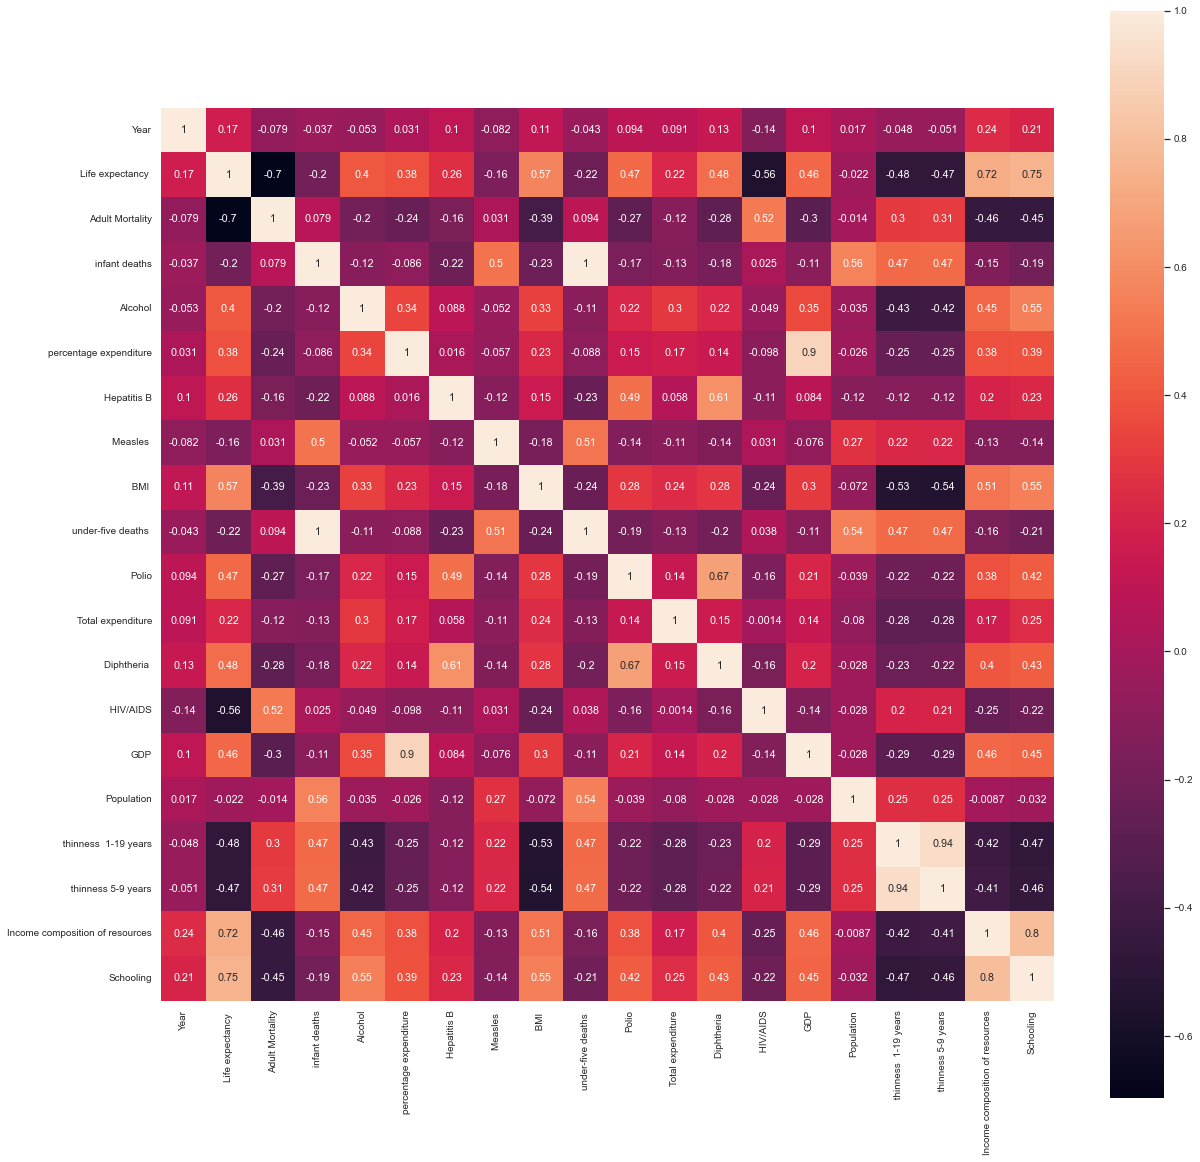

In [9]:
# Visualizing
sns.set(font_scale=0.9,rc = {'figure.figsize':(20,20)})

sns.heatmap(cm, cbar=True, annot=True, square=True)

# Modeling

In [10]:
# Selecting features for best and worst model
absolute = abs(cm['Life expectancy '])
absolute[absolute > 0.4]

Life expectancy                    1.000000
Adult Mortality                    0.696359
Alcohol                            0.404877
 BMI                               0.567694
Polio                              0.465556
Diphtheria                         0.479495
 HIV/AIDS                          0.556556
GDP                                0.461455
 thinness  1-19 years              0.477183
 thinness 5-9 years                0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
# Selecting our features and value that we are trying to predict using column locations 
df_0 = df_0.iloc[:,[3,4,10,14,15,16,18,20,21]]# Life Expectancy,Adult Mortality,BMI,Income composition of resources, Schooling,HIV/AIDS,GDP,thinness 1-19 years,Diphteria 
df_1 = df_1.iloc[:,[3,5,6,8,11,14,15,16,19]]
df_2 = df_2.iloc[:,[3,5,6,7,9,10,13,16,17]]
df_3 = df_3.iloc[:,[2,3,4,10,14,15,18,20,21]]
df_4 = df_4.iloc[:,[1,3,5,8,9,13,15,16,17]]

In [14]:
#Check
df_0.head()

,Life expectancy,Adult Mortality,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,65.0,263.0,19.1,65.0,0.1,584.259210,17.2,0.479,10.1
1,59.9,271.0,18.6,62.0,0.1,612.696514,17.5,0.476,10.0
2,59.9,268.0,18.1,64.0,0.1,631.744976,17.7,0.470,9.9
3,59.5,272.0,17.6,67.0,0.1,669.959000,17.9,0.463,9.8
4,59.2,275.0,17.2,68.0,0.1,63.537231,18.2,0.454,9.5


In [15]:
df_1.head()

,Life expectancy,infant deaths,Alcohol,Hepatitis B,under-five deaths,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years
0,65.0,62,0.01,65.0,83,65.0,0.1,584.259210,17.3
1,59.9,64,0.01,62.0,86,62.0,0.1,612.696514,17.5
2,59.9,66,0.01,64.0,89,64.0,0.1,631.744976,17.7
3,59.5,69,0.01,67.0,93,67.0,0.1,669.959000,18.0
4,59.2,71,0.01,68.0,97,68.0,0.1,63.537231,18.2


In [16]:
df_2.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,GDP,Population
0,65.0,62,0.01,71.279624,1154,19.1,8.16,584.259210,33736494.0
1,59.9,64,0.01,73.523582,492,18.6,8.18,612.696514,327582.0
2,59.9,66,0.01,73.219243,430,18.1,8.13,631.744976,31731688.0
3,59.5,69,0.01,78.184215,2787,17.6,8.52,669.959000,3696958.0
4,59.2,71,0.01,7.097109,3013,17.2,7.87,63.537231,2978599.0


In [17]:
df_3.head()

,Status,Life expectancy,Adult Mortality,BMI,Diphtheria,HIV/AIDS,thinness 1-19 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,19.1,65.0,0.1,17.2,0.479,10.1
1,Developing,59.9,271.0,18.6,62.0,0.1,17.5,0.476,10.0
2,Developing,59.9,268.0,18.1,64.0,0.1,17.7,0.470,9.9
3,Developing,59.5,272.0,17.6,67.0,0.1,17.9,0.463,9.8
4,Developing,59.2,275.0,17.2,68.0,0.1,18.2,0.454,9.5


In [18]:
df_4.head()

,Year,Life expectancy,infant deaths,Hepatitis B,Measles,Total expenditure,HIV/AIDS,GDP,Population
0,2015,65.0,62,65.0,1154,8.16,0.1,584.259210,33736494.0
1,2014,59.9,64,62.0,492,8.18,0.1,612.696514,327582.0
2,2013,59.9,66,64.0,430,8.13,0.1,631.744976,31731688.0
3,2012,59.5,69,67.0,2787,8.52,0.1,669.959000,3696958.0
4,2011,59.2,71,68.0,3013,7.87,0.1,63.537231,2978599.0


In [19]:
# Splitting Data

x = df_0.iloc[:,[1,2,3,4,5,6,7,8]] # variables
y = df_0.iloc[:,[0]] # Life expectancy

x1 = df_1.iloc[:,[1,2,3,4,5,6,7,8]] # variables
y1 = df_1.iloc[:,[0]] # Life expectancy

x2 = df_2.iloc[:,[1,2,3,4,5,6,7,8]] # variables
y2 = df_2.iloc[:,[0]] # Life expectancy

x3 = df_3.iloc[:,[0,2,3,4,5,6,7,8]] # variables
y3 = df_3.iloc[:,[1]] # Life expectancy

x4 = df_4.iloc[:,[0,2,3,4,5,6,7,8]] # variables
y4 = df_4.iloc[:,[1]] # Life expectancy

In [20]:
### Getting dummies for our data at and df_3 and (Tokenizing our features that include String to fit into Lineer Regression)
x3 = pd.get_dummies(data=x3)

In [21]:
# Splitting data part2
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=147)
x1_train, x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=147)
x2_train, x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3, random_state=147)
x3_train, x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.3, random_state=147)
x4_train, x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.3, random_state=147)

In [22]:
# Scaling our features to -1 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_xtrain=scaler.fit_transform(x_train)

In [23]:
scaler_1 = MinMaxScaler(feature_range=(0,1))
scaled_x1train=scaler_1.fit_transform(x1_train)

In [24]:
scaler_2 = MinMaxScaler(feature_range=(0,1))
scaled_x2train=scaler_2.fit_transform(x2_train)

In [25]:
scaler_3 = MinMaxScaler(feature_range=(0,1))
scaled_x3train=scaler_3.fit_transform(x3_train)

In [26]:
scaler_4 = MinMaxScaler(feature_range=(0,1))
scaled_x4train=scaler_4.fit_transform(x4_train)

In [27]:
scaled_xtrain

array([[0.17458101, 0.31627297, 0.98969072, ..., 0.28985507, 0.63703704,
        0.5804878 ],
       [0.05586592, 0.30314961, 0.79381443, ..., 0.56521739, 0.59153439,
        0.56097561],
       [0.27653631, 0.74934383, 0.63917526, ..., 0.1884058 , 0.6962963 ,
        0.49268293],
       ...,
       [0.00698324, 0.83989501, 0.96907216, ..., 0.01811594, 0.92486772,
        0.85365854],
       [0.32541899, 0.22834646, 0.96907216, ..., 0.61594203, 0.        ,
        0.51219512],
       [0.04608939, 0.16404199, 0.96907216, ..., 0.33695652, 0.        ,
        0.26341463]])

In [28]:
# Creating our model
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()
model_4 = LinearRegression()

In [29]:
model_0.fit(scaled_xtrain,y_train)
model_1.fit(scaled_x1train,y1_train)
model_2.fit(scaled_x2train,y2_train)
model_3.fit(scaled_x3train,y3_train)
model_4.fit(scaled_x4train,y4_train)

LinearRegression()

In [30]:
# Scaling our test values to 0-1 scale NOT FITTING
scaled_Xtest=scaler.transform(x_test)
y_predict=model_0.predict(scaled_Xtest)

In [31]:
#Running our model and predicting
scaled_X1test=scaler_1.transform(x1_test)
y1_predict=model_1.predict(scaled_X1test)

In [32]:
scaled_X2test=scaler_2.transform(x2_test)
y2_predict=model_2.predict(scaled_X2test)

In [33]:
scaled_X3test=scaler_3.transform(x3_test)
y3_predict=model_3.predict(scaled_X3test)

In [34]:
scaled_X4test=scaler_4.transform(x4_test)
y4_predict=model_4.predict(scaled_X4test)

In [35]:
# We need a 1D array thats why flatten()
model_0.coef_.flatten()

array([-12.02064363,   2.24184619,   4.66701246, -23.79040303,
         5.86292067,  -2.07339718,   7.50047616,  20.13353239])

In [36]:
# It has to be a number not array
float(model_0.intercept_)

50.959377593116834

In [37]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
str_0="y="
for i,m in enumerate(model_0.coef_.flatten()):
    str_0+= "x_{}*{}+".format(i, m)
str_0+=str(float(model_0.intercept_))

str_1="y="
for i,m in enumerate(model_1.coef_.flatten()):
    str_1+= "x_{}*{}+".format(i, m)
str_1+=str(float(model_1.intercept_))

str_2="y="
for i,m in enumerate(model_2.coef_.flatten()):
    str_2+= "x_{}*{}+".format(i, m)
str_2+=str(float(model_2.intercept_))

str_3="y="
for i,m in enumerate(model_3.coef_.flatten()):
    str_3+= "x_{}*{}+".format(i, m)
str_3+=str(float(model_3.intercept_))


str_4="y="
for i,m in enumerate(model_4.coef_.flatten()):
    str_4+= "x_{}*{}+".format(i, m)
str_4+=str(float(model_4.intercept_))

In [38]:
# Scores Evaluating and Lineer Regression formula
print("Model_0 3 scores below")
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))
print(str_0)
print()
print('Model_1 3 scores below')
print(mean_absolute_error(y1_test,y1_predict))
print(mean_squared_error(y1_test,y1_predict))
print(r2_score(y1_test,y1_predict))
print(str_1)
print()
print('Model_2 3 scores below')
print(mean_absolute_error(y2_test,y2_predict))
print(mean_squared_error(y2_test,y2_predict))
print(r2_score(y2_test,y2_predict))
print(str_2)
print()
print('Model_3 3 scores below')
print(mean_absolute_error(y3_test,y3_predict))
print(mean_squared_error(y3_test,y3_predict))
print(r2_score(y3_test,y3_predict))
print(str_3)
print()
print('Model_4 3 scores below')
print(mean_absolute_error(y4_test,y4_predict))
print(mean_squared_error(y4_test,y4_predict))
print(r2_score(y4_test,y4_predict))
print(str_4)

Model_0 3 scores below
2.9906658831984165
16.31082140360758
0.8225751887180066
y=x_0*-12.020643634174435+x_1*2.241846189662926+x_2*4.667012460323642+x_3*-23.7904030274029+x_4*5.862920665909643+x_5*-2.0733971844083867+x_6*7.500476164760782+x_7*20.133532385627056+50.959377593116834

Model_1 3 scores below
4.014039936458332
26.018867456574156
0.6450320022632019
y=x_0*250.53839293212604+x_1*7.08004008155666+x_2*1.0637956353147473+x_3*-249.92465455014496+x_4*4.085759534866071+x_5*-36.879095500010614+x_6*19.093610656616995+x_7*-10.720620606223136+66.05040565852516

Model_2 3 scores below
5.923644663509609
59.422443967549555
0.41969457652874365
y=x_0*-2.016027659357199+x_1*4.28258023781374+x_2*-5.886460257679525+x_3*-5.07667867608056+x_4*17.67382776961759+x_5*2.451768978224008+x_6*26.517489807654783+x_7*2.239862368146948+56.758404999198206

Model_3 3 scores below
3.0972288599789755
16.450183462752502
0.8117426687221057
y=x_0*-12.23560709363712+x_1*2.864125784576391+x_2*4.419995079370917+x_3*-

# Extra visualization


## Model 0 features graphs

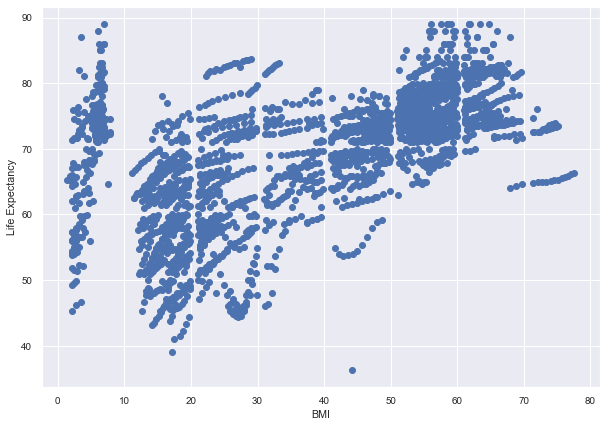

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(df_0[' BMI '],df_0['Life expectancy '])
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.show()

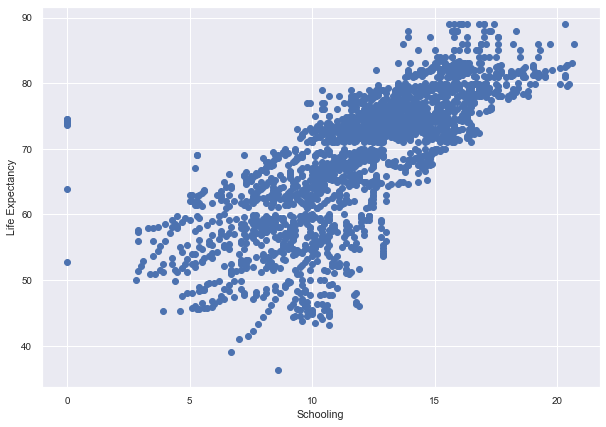

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(df_0['Schooling'],df_0['Life expectancy '])
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
#pt.xlim([0,1])
plt.show()

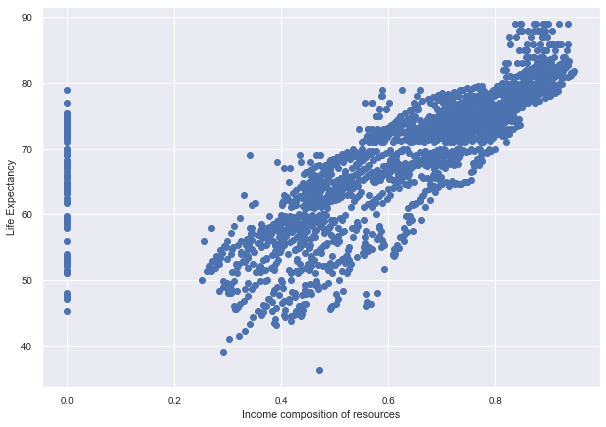

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(df_0['Income composition of resources'],df_0['Life expectancy '])
plt.xlabel('Income composition of resources')
plt.ylabel("Life Expectancy")
plt.show()

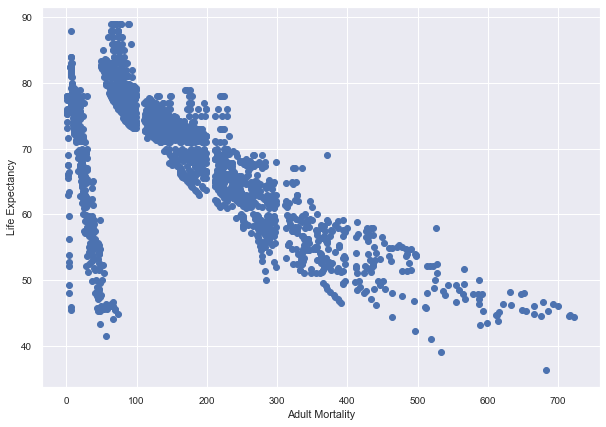

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(df_0['Adult Mortality'],df_0['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel("Life Expectancy")
plt.show()

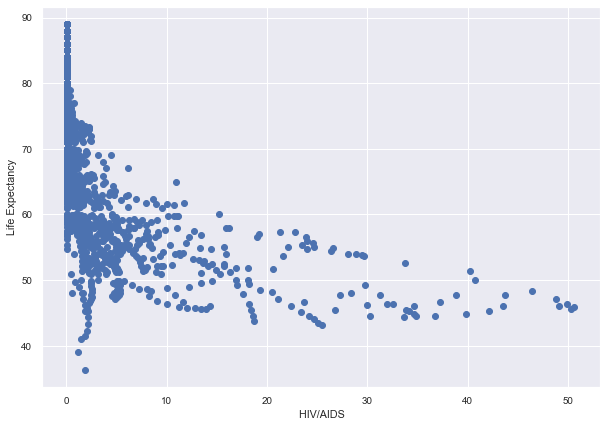

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(df_0[' HIV/AIDS'],df_0['Life expectancy '])
plt.xlabel(' HIV/AIDS')
plt.ylabel("Life Expectancy")
plt.show()

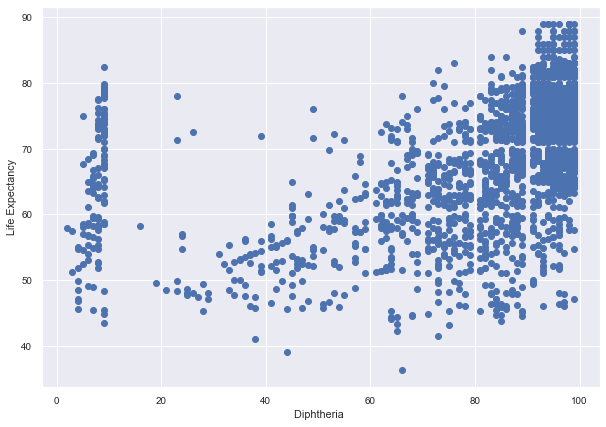

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(df_0['Diphtheria '],df_0['Life expectancy '])
plt.xlabel('Diphtheria ')
plt.ylabel("Life Expectancy")
plt.show()

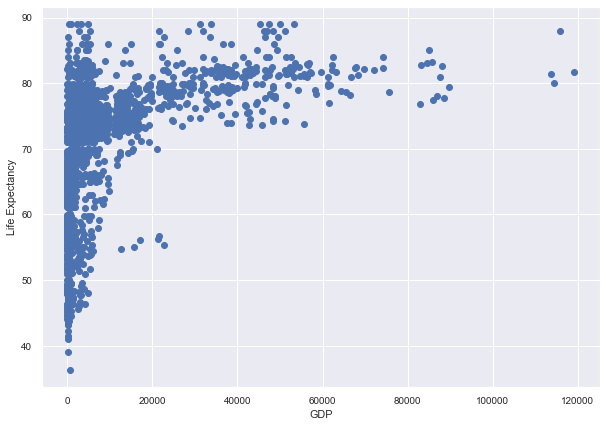

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(df_0['GDP'],df_0['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel("Life Expectancy")
plt.show()

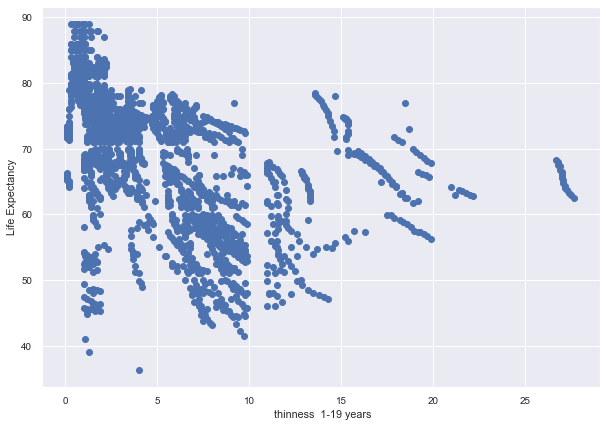

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(df_0[' thinness  1-19 years'],df_0['Life expectancy '])
plt.xlabel(' thinness  1-19 years')
plt.ylabel("Life Expectancy")
plt.show()

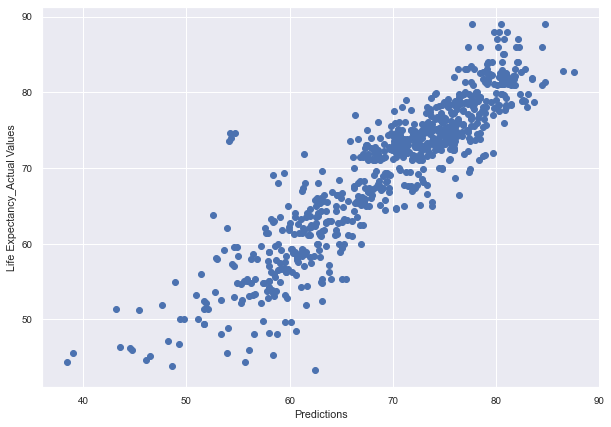

In [47]:
# Model 0 graph
plt.figure(figsize=(10,7))
plt.scatter(y_predict,y_test['Life expectancy '])
plt.xlabel("Predictions")
plt.ylabel("Life Expectancy_Actual Values")
#pt.xlim([0,1])
plt.show()

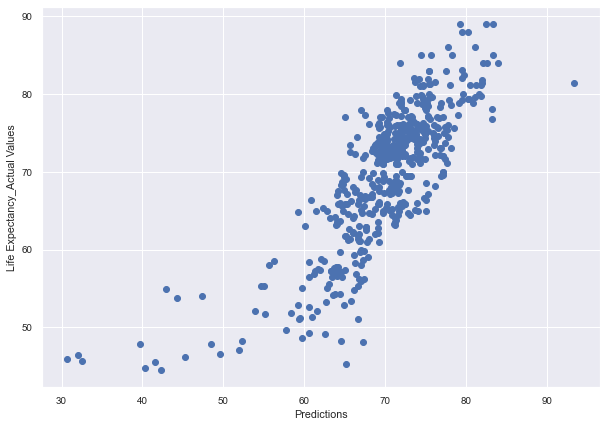

In [48]:
# Model 1 graph
plt.figure(figsize=(10,7))
plt.scatter(y1_predict,y1_test['Life expectancy '])
plt.xlabel("Predictions")
plt.ylabel("Life Expectancy_Actual Values")
#pt.xlim([0,1])
plt.show()

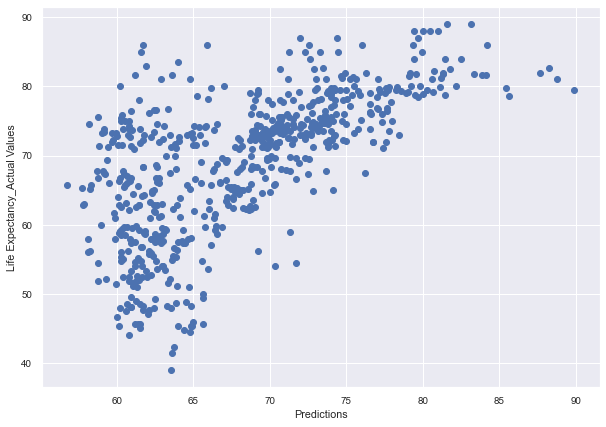

In [49]:
# Model 2 graph
plt.figure(figsize=(10,7))
plt.scatter(y2_predict,y2_test['Life expectancy '])
plt.xlabel("Predictions")
plt.ylabel("Life Expectancy_Actual Values")
#pt.xlim([0,1])
plt.show()

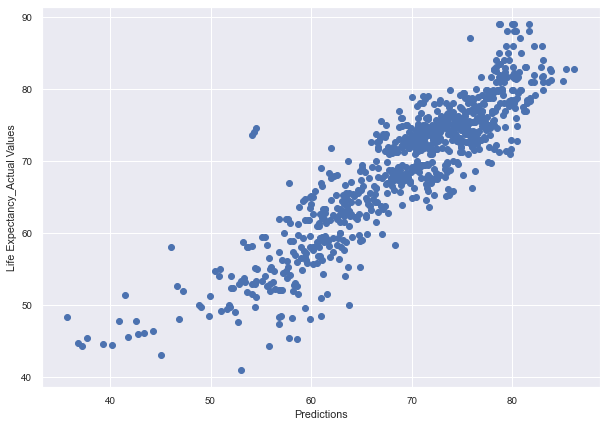

In [50]:
#Model 3 graph
plt.figure(figsize=(10,7))
plt.scatter(y3_predict,y3_test['Life expectancy '])
plt.xlabel("Predictions")
plt.ylabel("Life Expectancy_Actual Values")
#pt.xlim([0,1])
plt.show()

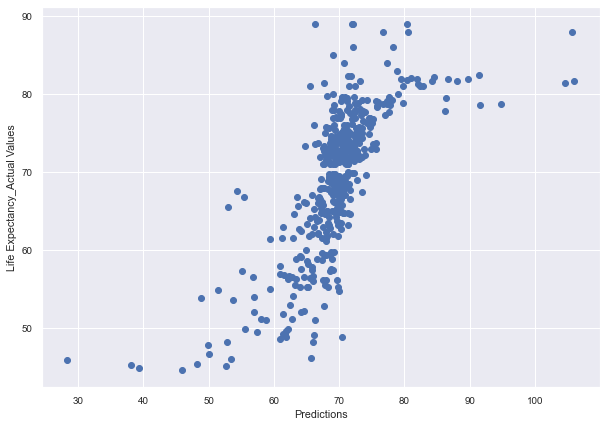

In [51]:
#Model 4 graph
plt.figure(figsize=(10,7))
plt.scatter(y4_predict,y4_test['Life expectancy '])
plt.xlabel("Predictions")
plt.ylabel("Life Expectancy_Actual Values")
#pt.xlim([0,1])
plt.show()